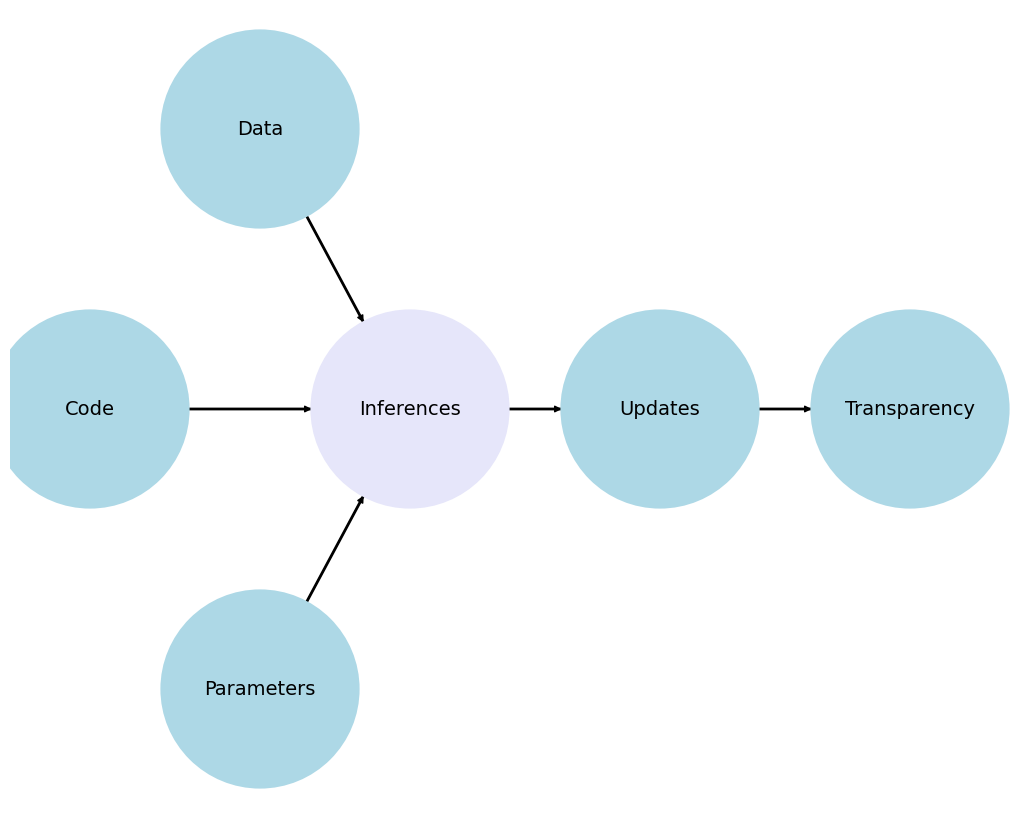

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("Data", pos=(-2500, 700))
G.add_node("Code", pos=(-4200, 0))
G.add_node("Inferences", pos=(-1000, 0))
G.add_node("Parameters", pos=(-2500, -700))
G.add_node("Updates", pos=(1500, 0))
G.add_node("Transparency", pos=(4000, 0))

G.add_edges_from([("Data", "Inferences")])
G.add_edges_from([("Code", "Inferences")])
G.add_edges_from([("Parameters", "Inferences")])
G.add_edges_from([("Inferences", "Updates")])
G.add_edges_from([("Updates", "Transparency")])

pos = nx.get_node_attributes(G, 'pos')
labels = {"Inferences": "Inferences",
          "Data": "Data",
          "Code": "Code",
          "Parameters": "Parameters",
          "Updates": "Updates",
          "Transparency": "Transparency"}  # Added label for "NDI" node in the labels dictionary

# Update color for the "Scenarios" node
node_colors = ["lightblue","lightblue", "lavender", "lightblue", "lightblue", "lightblue"]
# node_colors = ["lightblue","lavender", "lavender", "lightgreen", "lightpink", "lightpink"]
# Suppress the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=20000, node_color=node_colors, linewidths=2, edge_color='black', style='solid')
nx.draw_networkx_labels(G, pos, labels, font_size=14) # , font_weight='bold'
nx.draw_networkx_edges(G, pos, edge_color='black', style='solid', width=2)
plt.xlim(-5000, 5000)
plt.ylim(-1000, 1000)
plt.axis("off")
plt.show()


# 6 GitHub Repository for Collaboration

This week, we'll apply the skills we've developed over the past five weeks to create a GitHub repository, which will serve as the basis for our projects in the coming weeks. The aim is not to achieve perfection initially, but to establish a foundation that can be built upon, potentially with the help of peers.

## Objectives:

1. **Create a Public GitHub Repository**:
   - Set up a repository named `project` on GitHub. You will be working individually, but you are encouraged to use [GitHub Discussions](https://github.com/jhufena/discussions/discussions) to seek help from your peers when needed.

2. **Utilize Publicly Available Data**:
   - The focus will be on using public data to explore the significance of "self-reported health" as a health indicator.

3. **Documentation and Transparency**:
   - Document your project comprehensively using a `README.md` file and other necessary documentation to make your analysis accessible and understandable. Embrace the principles of [Open Science](https://publichealth.jhu.edu/the-r3-center-for-innovation-in-science-education) which are Rigor, Reproducibility, and Responsibility.

## Detailed Steps and Resources:

### 6.1 Data Acquisition and Preparation:

- **Survey Data**:
  - Import the survey data from the 1999-2000 National Health and Nutrition Examination Survey (NHANES):
    ```stata
    import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/DEMO.XPT", clear
    ```

- **Mortality Follow-up Data**:
  - Obtain follow-up mortality data to analyze over a 20-year period from the National Center for Health Statistics (NCHS). Detailed linkage instructions are available on the [Linked Mortality](https://ftp.cdc.gov/pub/) page:
     - Health Statistics
        - NCHS
           - Datalinkage
              - Linked Mortality
                 - `NHANES_1999_2000_MORT_2019_PUBLIC.dat`
                 - `Stata_ReadInProgramAllSurveys.do`
                 
                             
```stata
 //data
 global mort_1999_2000 https://ftp.cdc.gov/pub/HEALTH_STATISTICS/NCHS/datalinkage/linked_mortality/NHANES_1999_2000_MORT_2019_PUBLIC.dat

 //code
cat https://ftp.cdc.gov/pub/HEALTH_STATISTICS/NCHS/datalinkage/linked_mortality/Stata_ReadInProgramAllSurveys.do
 ```

### 6.2 Code Development:

- **Edit and Rename Provided Script**:
  - Download, modify, and upload the provided Stata `.do` file for linking the DEMO.XPT data to mortality follow-up data. Rename this file to `followup.do` and commit it with the description: "Updated DEMO.XPT linkage .do file". In otherwords, download, modify, and upload `Stata_ReadInProgramAllSurveys.do`. You may watch the week 6 video for the key items to edit. For instance, you may edit it so that it reads in the data directly from the website.

- **Data Merging**:
  - Execute the following Stata code to merge the survey data with the mortality data, ensuring alignment on the unique sequence numbers:
    ```stata
    //use your own username/project repo instead of the class repo below
    global repo "https://github.com/jhustata/intermediate/raw/main/"
    do ${repo}followup.do
    save followup, replace 
    import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/DEMO.XPT", clear
    merge 1:1 seqn using followup
    lookfor follow
    ```

### 6.3 Key Parameters for Week 7s Analysis:

- **Self-Reported Health Assessment**:
  - Import the specific health questionnaire data and prepare it for analysis in Week 7:
    ```stata
    import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/HUQ.XPT", clear
    ```
<Details>
   <Summary> 🔑 </Summary>

Here's a first iteration of a script that answers they project main goal. Save it as project.do and upload it to you repo. Keep updating it over the next two weeks, with a meaningful commit statement each time for version control.

```stata
global repo "https://github.com/jhustata/intermediate/raw/main/"
do ${repo}followup.do
save followup, replace 
import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/DEMO.XPT", clear
merge 1:1 seqn using followup
lookfor follow
lookfor mortstat permth_int eligstat 
keep if eligstat==1
capture g years=permth_int/12
codebook mortstat
stset years, fail(mortstat)
sts graph, fail
save demo_mortality, replace 
import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/HUQ.XPT", clear 
merge 1:1 seqn using demo_mortality, nogen
sts graph, by(huq010) fail
stcox i.huq010
```

</Details>

### 6.4 Inferences 

Please review [documentation](https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/HUQ.htm) for the file `HUQ.XPT`, which includes the variable `huq010`

**Employ 95%CI and p-values**

The following snippet will lay the foundation for your statistical, clinical, and public health inferences:

```stata
merge 1:1 seqn using demo_mortality, nogen
sts graph, by(huq010) fail
stcox i.huq010
```

**Write a brief abstract-style conclusion**
But learn a little more about the simple questionnaire item of interest to this project:

```stata
import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/HUQ.XPT", clear 
huq010 
desc huq010
codebook huq010
```

> I have some general questions about your health. Would you say your health in general is:
   > - Excellent
   > - Very good
   > - Good
   > - Fair
   > - Poor?

You task is to provide rigorous and reproducible evidence that responsibly answers this very simple, but overlooked "screener" in both clinical and public health settings.

### 6.5 Upcoming Updates and Critiques:

- **Critique a Recent Article**:
  - Engage with recent literature, such as [this study](https://www.sciencedirect.com/science/article/pii/S2666535222000532), to cursorily consider your approach to this simple question vs. the approach these authors took. What is the key difference?

- **Plan for Generalizing the Analytic Script**:
  - Adapt your script to handle similar data from any period between 1999 and 2019.

### 6.6 Documentation and Reproducibility:

- **Enhance Documentation**:
  - Refer to exemplary documentation practices from major repositories like [Apple](https://github.com/apple/swift), [Google](https://github.com/google/googletest), and [Meta](https://github.com/meta-llama/llama3).

- **Commit to Transparency**:
  - Make your code and data handling processes as clear and simple as possible to facilitate easy understanding and replication by others.



 



### 6.7 Lab 

#### Setting Up Your GitHub Project

**Objective**: Set up a GitHub repository for collaborative health data analysis.

**Tasks**:
1. **Create a GitHub Repository**: Follow the provided instructions to create a public GitHub repository named `project`. Make sure the repository settings allow for discussions and issues to encourage collaboration.
2. **Initial Commit**:
   - Add a `README.md` file explaining the project's purpose, how to contribute, and a brief description of the data sources used (DEMO.XPT and mortality linkage data).
   - Commit these changes with a meaningful message, such as "Initial commit with README.md".

**Instructions**:
- Use the GitHub interface to create and configure the repository.
- Write the `README.md` file using Markdown formatting to make it clear and engaging.
- Include links to the data sources and any relevant documentation or tutorials that might help collaborators.
- Copy & paste the content of the `README.md` into a new file called `index.md`. 
   - Click on settings once done
   - Activate `pages` as you did in previous homeworks
   - This will create a URL for your project, accessible even to those who don't have GitHub accounts
   - Improve the aesthetic and usability of this website each week

### 6.8 Homework
- Submit the URL of your GitHub Page. Ensure it is set to public so it can be accessed and reviewed.
- Next week you'll include results from your analysis and some beautiful graphics (see section **6.3** above for your foundational code)

